In [4]:
import os
import shutil
from PIL import Image
import pathlib
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import AdamW
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
dataset = []
labels = []

classes = ['acne', 'oily', 'dry', 'normal']

original_path = 'face skin type'

new_path = 'dataset'

# Create new folders
os.makedirs(new_path, exist_ok=True)
for class_name in classes:
    os.makedirs(os.path.join(new_path, class_name), exist_ok=True)

# Reload and save each image to the new folder
for label, class_name in enumerate(classes):
    folder = os.path.join(original_path, class_name)
    for i, filename in enumerate(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        try:
            img = Image.open(img_path).convert('RGB')  # Load as RGB

            # If the image is in float format, convert to uint8 by scaling and converting to uint8
            if np.max(np.array(img)) <= 1.0:  # Checking if the image is in float64 or float32 (0 to 1)
                img = img_as_ubyte(img)  # Convert to uint8 (0-255 range)

            # New filename to avoid overwrite
            new_filename = f"{class_name}_{i}.jpg"
            save_path = os.path.join(new_path, class_name, new_filename)
            img.save(save_path)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

print("All images successfully copied to", new_path)

All images successfully copied to dataset


## Dataset Checking

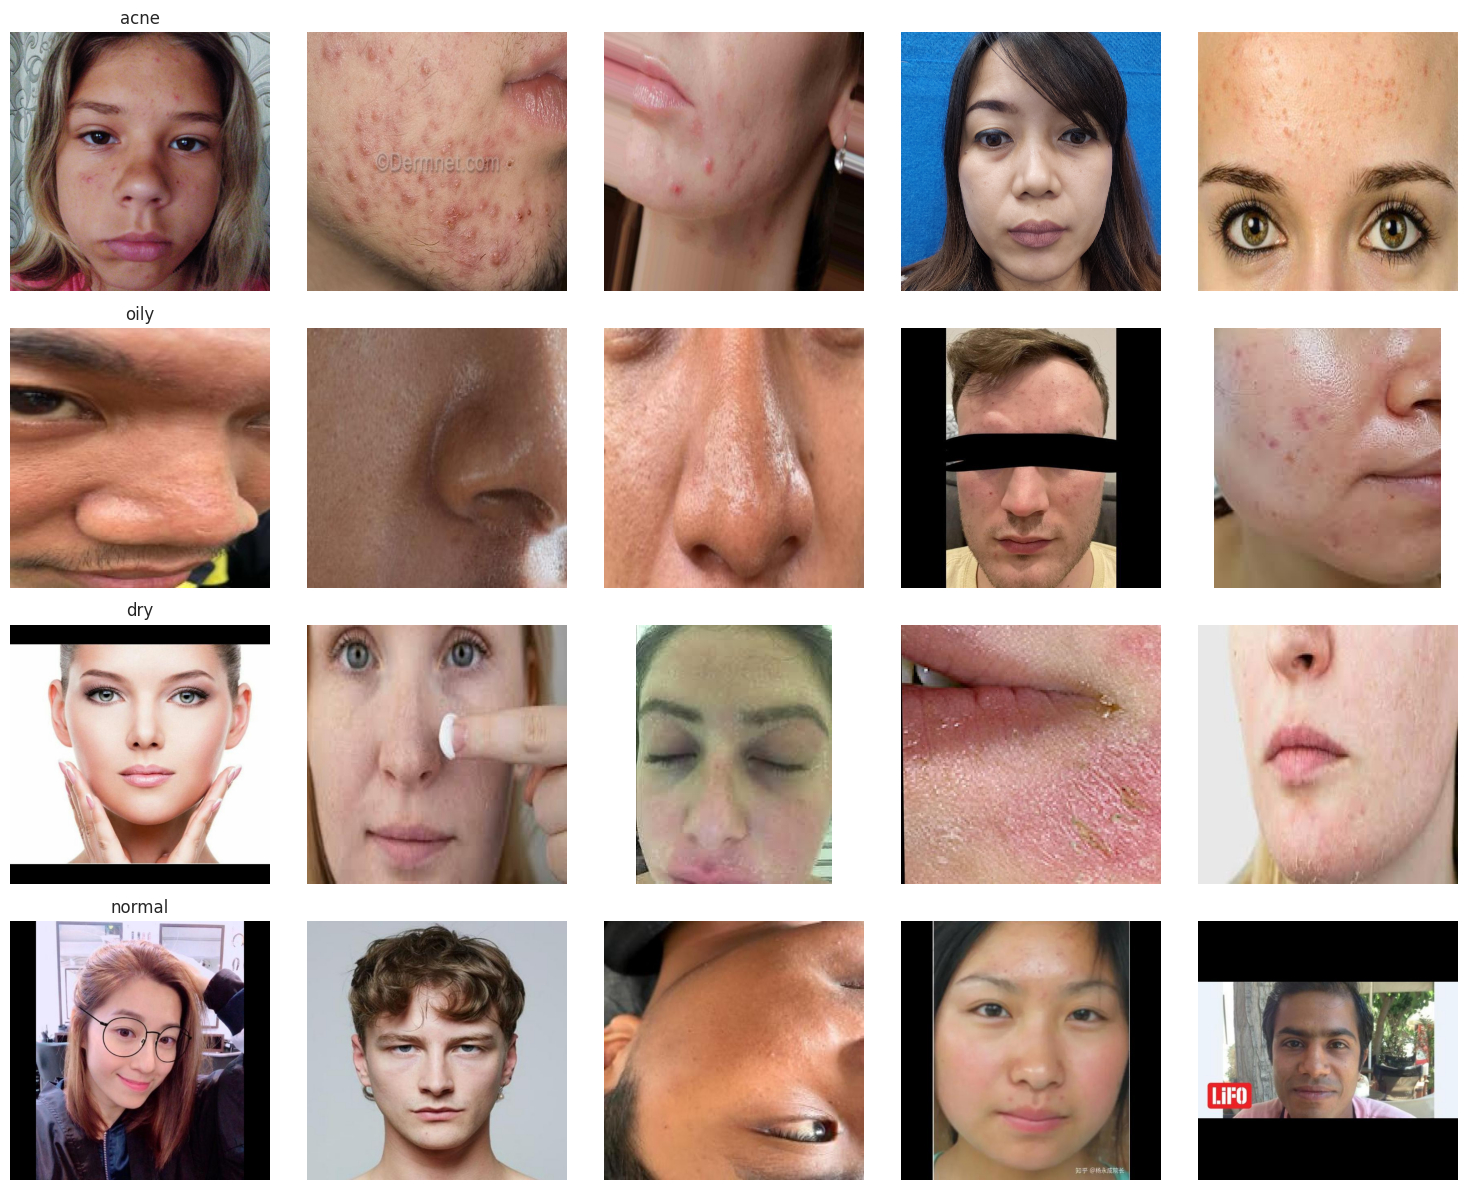

In [10]:
dataset_path = 'dataset'
# classes = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 
#            'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

# Show 5 random images per class
fig, axs = plt.subplots(len(classes), 5, figsize=(15, 3 * len(classes)))

for i, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_path, class_name)
    image_files = os.listdir(class_dir)
    selected_images = random.sample(image_files, 5)  # Get 5 random images

    for j, img_file in enumerate(selected_images):
        img_path = os.path.join(class_dir, img_file)
        img = Image.open(img_path).convert("RGB")
        axs[i, j].imshow(img)
        axs[i, j].set_title(class_name if j == 0 else "")
        axs[i, j].axis("off")

plt.tight_layout()
plt.show()

## Dataset Distribution

/tmp/ipykernel_5441/3614056517.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Label', y='Image Count', palette="Set3")


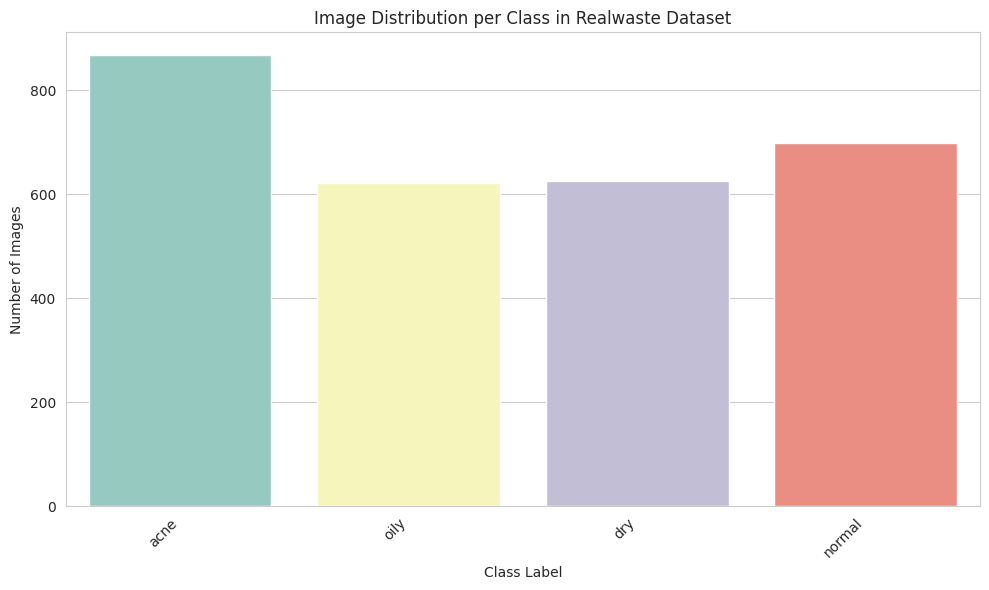

In [11]:
# Count images per class
label_counts = []

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    count = len(os.listdir(class_dir))
    label_counts.append((class_name, count))

# Create dataframe
df = pd.DataFrame(label_counts, columns=['Label', 'Image Count'])

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=df, x='Label', y='Image Count', palette="Set3")
plt.title("Image Distribution per Class in Realwaste Dataset")
plt.xlabel("Class Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()